<center><font size="5"><b> PYSPRINT 0.12.1 </b></font> </center>

### 7. Fourier-transzformációs módszer, FFTMethod

####  Az `FFTMethod` specifikus függvények:

* `shift(axis="x")`
  * Azonos a `scipy.fftpack.fftshift`-tel, azaz
  > Shift the zero-frequency component to the center of the spectrum.
  * Az axis lehet `x`, `y`, `both`, `yx`, `xy`, értelemszerűen ezeket fogja váltani.
  
  ---

* `ifft(usenifft=False, eps=1e-12, exponent="positive")`
  * Inverz Fourier-transzformálja a megadott adatsort. Alapértelmezetten először lineárisan interpolálja az adatsort, majd utána hajtja végre a transzformációt. Ha `usenifft=True`, akkor az ún. *Non-uniform (inverse) FFT* algoritmust [1] használja a lineáris interpoláció *nélkül*.
  ---
* `fft`
  * Fourier-transzformálja az adatsort.
  ---
* `window(at, fwhm, window_order=6, plot=True)`
  * Épít egy Gaussos ablakfüggvényt, amivel a jelenlegi adatsort majd később megszorozzuk.
  * `at` : az ablakfüggvény központi helye
  * `fwhm` : az ablakfüggvény félértékszélessége (igazodik az exponenciális kitevőjéhez)
  * `window_order` : az ablakfüggvény kitevője (ha páratlan, akkor eggyel megnöveli a program)
  * `plot` : ha `True`, akkor azonnal ki is plottolja a `plt.show()` nélkül
  ---
* `apply_window`
  * A beállított paraméterekkel rendelkező ablakfüggvényt alkalmazza az adatsorra.
---
* `build_phase`
  * Miután a transzformációkat és a kivágást elvégeztük visszaadja *csak* a fázist (pontosabban `ps.Phase` objektumot), de illesztést nem végez. 
  
---
* `calculate(reference_point, order, show_graph=False)`
  * Miután a transzformációkat és a kivágást elvégeztük illesztéssel kiszámítja a diszperziós együtthatókat.
  * `reference_point` : a referencia frekvencia
  * `order` : a kívánt illesztés (és így a diszperzió) rendje
  * `show_graph` : ha `True`, akkor plottolja a kapott fázist és az illesztett görbét
  
---
* <code>autorun(
    reference_point=None,
    order=None,
    *,
    enable_printing=True,
    skip_domain_check=False,
    only_phase=False,
    show_graph=True,
    usenifft=False
)
</code>
  
  * Automatikusan futtassa a Fourier-transzformációs kiértékelést. Egyelőre ez még kísérleti jellegű, de azon vagyok, hogy minél megbízhatóbban működjön.
  * `reference_point` : referencia frekvencia (ha nincs megadva, akkor az `only_phase` mód aktiválódik)
  * `order` : az illesztés rendje (ha nincs megadva, akkor az `only_phase` mód aktiválódik)
  * `enable_printing` : ha `True` konzolba kiírja minden lépés részletes eredményét
  * `skip_domain_check` : Ha a program úgy látja, hogy nem frekvenciatartományban van az adatsor, akkor automatikusan átváltja azt. Ha `True`, akkor azzal kényszeríti a függvényt, hogy ne végezzen semmilyen vizsgálatot.
  * `only_phase` : Csak a fázist adja vissza illesztés nélkül. Amennyiben az `order` vagy `reference_point` nincs megadva, akkor ez `True`-ra állítódik.
  * `show_graph` : ha `True`, akkor plottolja a kapott fázist és az illesztett görbét
  * `usenifft` : Használja az [1]-ben leírt *NUFFT* algoritmust.
  
---
* `get_pulse_shape_from_array(x_sample, y_sample, truncate=True, tol=None)`
  * Amennyiben az adott adatsorhoz tartozó fázis kiszámolásra került már valahol (vagyis `FFTMethod.phase` létezik már), akkor kiszámolja az impulzus időbeli alakját. Ehhez meg kell adni a tárgykar spektrumát, vagyis `x_sample`, `y_sample` adatsorokat. Ehhez a következőt kell kiszámolni:
  $I(t) = |\mathcal{F}^{-1}(\sqrt{|I_{tárgy}(\omega)|}\cdot e^{-i\Phi{(\omega)}})|^2$
 
    A kiszámolt fázis és a tárgykar *x* tengelye nem feltétlenül azonos (numerikus hibák az FFT-k miatt, zaj kivágása, stb.), emiatt létezik a `truncate` és `tol` paraméter.
  * `truncate` : Ha `True`, akkor megkeresi a fázis és a megadott tárgykar spektrumának leghosszabb közös részsorozatát  a tolerancia értéken belül úgy, hogy a megfelelő *y* értékek kerüljenek összeszorzásra.
  * `tol`: Az a tolerancia érték, amelyen belül két különböző *x* érték azonosnak tekintődik. A numerikus hibák kiküszöbölése miatt létezik. Ha nincs megadva, akkor az értéke automatikusan `np.max(np.diff(x_sample))`. Amennyiben több érték van a tolerancián belül, akkor a legközelebbi érték kerül kiválasztásra.
  ---
* `get_pulse_shape_from_file(filename, truncate=True, tol=None, chdomain=False, **kwargs)`
  * Teljesen azonos az előző függvénnyel, csak a tárgykar spektrumának betöltése fájlból történik.
  * `chdomain` : Ha `True`, akkor a betöltött fájlt hullámhossztartományból átváltja frevenciatartományba.
  * `**kwargs` : További argumentumok, amik a beolvasáshoz szükségesek. Több információ [itt olvasható.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
  ---
* `errorplot(*args, **kwargs)`
  * Ha a fázisra függvényt illesztettünk, akkor az adatsort és az illesztett görbe közti eltérést mutatja.
  * `*args, **kwargs` : további argumentumok, amiket a `ps.core.phase.Phase.errorplot` elfogad. További információ erről a `Phase` objektumról szóló részben.
  ---
* [1] Greengard, Leslie & Lee, June-Yub.: *Accelerating the
    Nonuniform Fast Fourier Transform*,
    Society for Industrial and Applied Mathematics.
    46. 443-454. (2004)
    ------

Alapvetően ennek a kiértékelésnek a lépései:

#### betöltés &rarr; előfeldolgozás &rarr; IFFT &rarr; ablakolás &rarr; FFT &rarr; fázis

Az ajánlott sorrend a függvények hívásában is ez, mivel nem garantált, hogy a tengelyek helyesen fognak transzformálódni tetszőleges sorrendű transzformációk után.

Itt következik néhány egyszerű példa.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysprint as ps

In [2]:
g = ps.Generator(1, 4, 2.5, 1500, GDD=400, TOD=400, FOD=1000, pulse_width=4, resolution=0.05)
g.generate_freq()

Egy automatikus kiértékelés:

Interferogram received.
Applying IFFT...Done
Acquiring gaussian window parameters...Done
A 12 order gaussian window centered at 2670.49 fs with FWHM 4055.12 fs was applied.


c:\pyt\pysprint\pysprint\core\fft_tools.py:148: UserWarning: The peak is too close to the origin, manual control is advised.
  UserWarning,


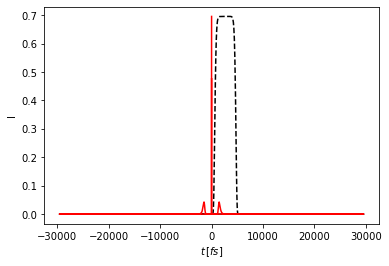

Applying FFT...Done
Calculating...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

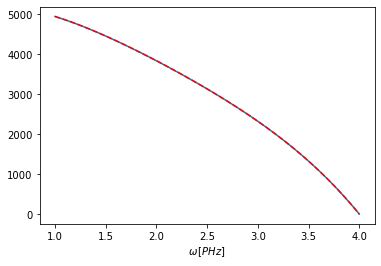

In [3]:
f = ps.FFTMethod(*g.data)
f.autorun(reference_point=2.5, order=4)

Egy másik automatikus kiértékelés (ugyan azon az interferogramon), ezúttal csak a fázist kapjuk meg. Ennek a fázisgrafikonnak a széleit kivágjuk a `slice` függvénnyel, majd a `fit` metódust használva számolhatjuk a diszperziós együtthatókat.

In [4]:
f2 = ps.FFTMethod(*g.data)
phase = f.autorun(show_graph=False, enable_printing=False)

print(type(phase))

phase.slice(1.1, 3.9)

phase.fit(reference_point=2.5, order=4);

c:\pyt\pysprint\pysprint\core\fft_tools.py:148: UserWarning: The peak is too close to the origin, manual control is advised.
  UserWarning,


<class 'pysprint.core.phase.Phase'>


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Bár látható volt, hogy a program jól határozta meg a Gauss ablakfüggvény paramétereit és ezáltal a diszperziós együtthatókat is, de jelzett, hogy a kivágandó csúcs túl közel van az origóhoz, így jobb ha azt manuálisan állítjuk be. Nézzük meg a fázist az illesztett görbével:

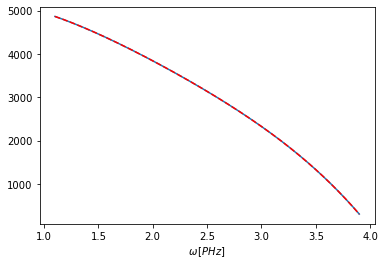

In [5]:
phase.plot()

Majd az illesztési hiba:

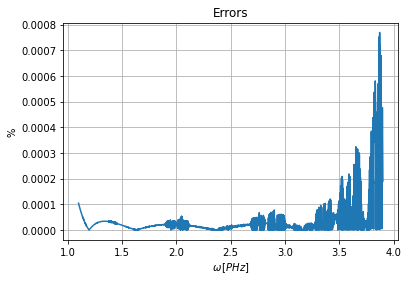

In [6]:
phase.errorplot(percent=True)

Nézzünk egy manuális kiértékelést. Itt a nekem meglévő interferogramot fogom használni, ami enyhén szólva sem ideális a Fourier-transzformációs kiértékeléshez, de megpróbálom a legtöbb használható információt kihozni belőle. Mivel már előre tudom hogy hogyan érdemes az ablakfüggvényt beállítani, így itt be tudom mutatni az ún. `inplace=False` argumentum működését. Alapvetően minden függvény amit meghívunk `inplace=True` módon hajtódik végre, azaz megváltoztatja magát az objektumot. Így működik pl. a python listáknál az `append` függvény:
```python
>>> a = []
>>> a.append(1)
>>> print(a)
[1]
```
A legtöbb függvénynél azonban lehetőség van megadni az `inplace=False` argumentumot, ami nem változtatja meg magát az objektumot, hanem visszaad egy új másolatot belőle, és kért függvényt azon a másolaton fogja végrehajtani. Ennek két előnye van: Az eredeti objektum (és így vele minden eredetileg betöltött adatsor) megmarad, és anélkül hogy újra és újra betöltenénk más objektumba az adatokat, ezért elég belőle egy. A második előny pedig abból adódik, hogy megengedi a műveletek láncolását, ahogy az alábbi példa mutatja. ([fluent interfacing](https://en.wikipedia.org/wiki/Fluent_interface) and [method cascading](https://en.wikipedia.org/wiki/Method_cascading)) Itt a szokásos kiértékelési lépéseket hajtottam végre. Az utolsó függvény amit meghívtam rajta, az a `build_phase`, ami egy fázist ad vissza, ezért a hosszú láncolat után az lesz a visszatérített érték (ezt elneveztem `phase3`-nak).

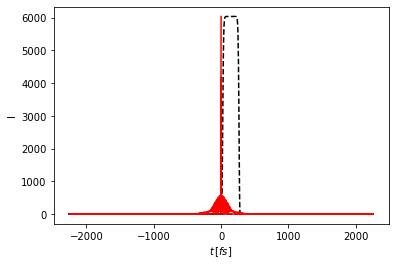

In [7]:
f3 = ps.FFTMethod.parse_raw('datasets/ifg.trt', skiprows=8, meta_len=8, decimal=",", delimiter=";")

phase3 = (
    f3.chdomain(inplace=False)
    .ifft(inplace=False)
    .window(at=145, fwhm=240, window_order=16, inplace=False)
    .apply_window(inplace=False)
    .fft(inplace=False)
    .build_phase()
)

Itt a jobb olvashatóság miatt minden új függvénynél új sort kezdtem és zárójelbe tettem. Ezek nélkül így festene:

In [8]:
phase4 = f3.chdomain(inplace=False).ifft(inplace=False).window(at=145, fwhm=240, window_order=16, plot=False, inplace=False).apply_window(inplace=False).fft(inplace=False).build_phase()

Mivel nem volt ideális az interferogram vizsgáljuk meg milyen fázist kaptunk vissza.

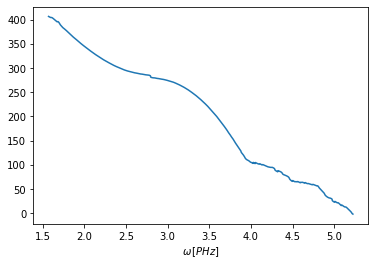

In [9]:
phase3.plot()

Itt észrevehető, hogy vannak olyan részei a görbének, amely valóban tartalmazza a minta fázistulajdonságait. Vágjuk ki ezt a részt a `slice` függvénnyel.

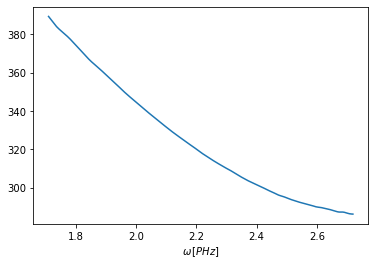

In [10]:
phase3.slice(1.71, 2.72)
phase3.plot()

Ezután végezzük el az illesztést a `fit` függvénnyel:

In [11]:
phase3.fit(reference_point=2.355, order=3);

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A kapott diszperziós együtthatók valóban jó közelítéssel tükrözik a mintára jellemző (már egyéb módszerekkel meghatározott) koefficienseket. Vizsgáljuk meg az illesztési hibát is:

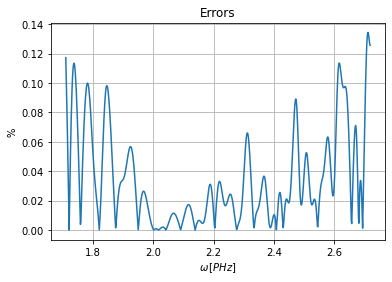

In [12]:
phase3.errorplot(percent=True)

Ugyan ez a kiértékelés hagyományosan, az `inplace=False` paraméterek nélkül így néz ki:

In [13]:
f4 = ps.FFTMethod.parse_raw('datasets/ifg.trt', skiprows=8, meta_len=8, decimal=",", delimiter=";")

f4.chdomain()

f4.ifft()

f4.window(at=145, fwhm=240, window_order=16, plot=False)

f4.apply_window()

f4.fft()

phase4 = f4.build_phase()

phase4.slice(1.71, 2.72)

phase4.fit(2.355, 3);

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Próbáljuk meg az impulzus időbeli alakját kiszámolni. Ehhez a `get_pulse_shape_from_file` függvényt fogom használni, aminek a tárgykar spektrumát adom meg.

In [14]:
x_t, y_t = f4.get_pulse_shape_from_file("datasets/sam.trt", truncate=True, chdomain=True, skiprows=8, decimal=",", sep=";")

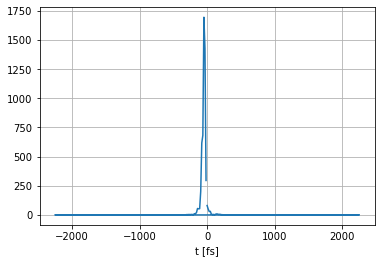

In [15]:
plt.plot(x_t, y_t)
plt.grid()
plt.xlabel("t [fs]");

Mivel a használt interferogram nem volt ideális, így itt az impulzus alakját nem lehetett tökéletesen visszakapni.

Alapértelmezetten néhány dolog el van rejtve a felhasználó elől. Az előző `get_pulse_shape_from_file` függvényt újra lefuttatom, ezúttal teljes logging outputtal. Ezt szinte soha nem kell használnunk, itt is csak a magyarázat miatt van létjogosultsága.

In [16]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

x_t, y_t = f4.get_pulse_shape_from_file("datasets/sam.trt", truncate=True, chdomain=True, skiprows=8, decimal=",", sep=";")

[ _fft.py:402 - get_pulse_shape_from_array() ] Shapes were truncated from 2.3226283197396467 to 2.7198388115237 with length 287.


Látható, hogy *2.322* és *2.719 PHz* között 287 adatpontnál sikerült kiszámítani a 
  $I(t) = |\mathcal{F}^{-1}\{\sqrt{|I_{tárgy}(\omega)|}\cdot e^{-i\Phi{(\omega)}}\}|^2$
kifejezés értékét. Ez annak köszönhető, hogy a kiszámolt fázist elég nagy tartományban nem tudtuk felhasználni (eredetileg a *1.71 - 2.72* *PHz* tartományt vágtuk ki), illetve az transzformációk során behozott numerikus hiba is közrejátszott.

Végül a Non-unifrom FFT használata. Itt teljesen ugyan azt hajtom végre, mint fentebb, csak `usenifft=True` argumentummal.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

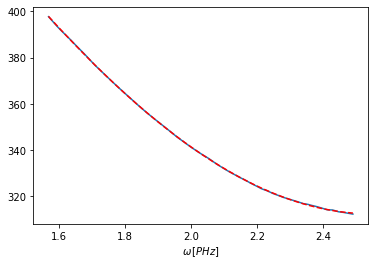

In [17]:
# csak visszaállítom a log szintet az alapértelmezettre, hogy ne árassza el a képernyőt
logger.setLevel(logging.ERROR)

f5 = ps.FFTMethod.parse_raw('datasets/ifg.trt', skiprows=8, meta_len=8, decimal=",", delimiter=";")

f5.chdomain()

f5.ifft(usenifft=True)

f5.window(at=155, fwhm=260, window_order=16, plot=False)

f5.apply_window()

f5.fft()

phase6 = f5.build_phase()

phase6.slice(None, 2.49)
phase6.fit(2.355, 3);
phase6.plot()

A szimulációk alapján a NUFFT valamivel pontatlanabb eredményt ad, mint az interpoláció + FFT.